<a href="https://colab.research.google.com/github/aysharega/Advanced-computing-Lab/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN over MNIST dataset

X_train Size:  (60000, 28, 28)
X_test Size:  (10000, 28, 28)
Y_train Size:  (60000,)
Y_test Size:  (10000,)
New X_train Size:  (60000, 28, 28, 1)
New X_test Size:  (10000, 28, 28, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
den

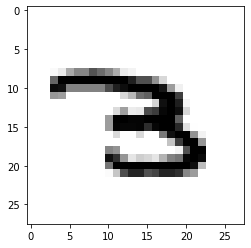

In [21]:
#CNN on MNIST
#1. Load and process MNIST
from tensorflow import keras
mnistDB = keras.datasets.mnist
(Xtrain, Ytrain),(Xtest, Ytest)=mnistDB.load_data()
print("X_train Size: ", Xtrain.shape)
print("X_test Size: ", Xtest.shape)
print("Y_train Size: ", Ytrain.shape)
print("Y_test Size: ", Ytest.shape)

import matplotlib.pyplot as plt
plt.imshow(Xtrain[250], cmap='binary')

#1b. Conversion to 1 channel
Xtrain =Xtrain.reshape((60000,28,28,1))
Xtest =Xtest.reshape((10000,28,28,1))
print("New X_train Size: ", Xtrain.shape)
print("New X_test Size: ", Xtest.shape)
#1c. Normalize
Xtrain =Xtrain.astype('float32')/255
Xtest =Xtest.astype('float32')/255
#2. Create CNN layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(32,(3,3), activation = "relu", input_shape=Xtrain.shape[1:]))
cnn.add(keras.layers.Conv2D(64,(3,3),activation = "relu"))
cnn.add(keras.layers.MaxPool2D(2,2))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(128, activation = "relu"))
cnn.add(keras.layers.Dropout(0.25))
cnn.add(keras.layers.Dense(10, activation = "softmax"))
cnn.summary()
#3. Compile and test
cnn.compile(loss="sparse_categorical_crossentropy", 
            optimizer="adam", metrics="accuracy")
cnn.fit(Xtrain,Ytrain, epochs=2, batch_size=16)






